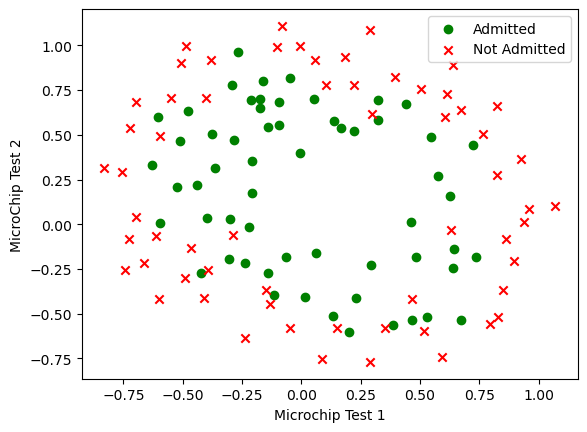

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

microchip_test1_label = "Microchip Test 1"
microchip_test2_label = "MicroChip Test 2"
admitted_label = "Admitted"

#读取数据
datas = pd.read_csv("./ex2data2.txt", header=None, names=[microchip_test1_label, microchip_test2_label, admitted_label])
# 获取数据个数
m = len(datas)
# 对数据进行分组
positive = datas.groupby(admitted_label).get_group(1)
negative = datas.groupby(admitted_label).get_group(0)

# 绘图
plt.scatter(x=positive[microchip_test1_label], y=positive[microchip_test2_label], marker='o', c='g', label='Admitted')
plt.scatter(x=negative[microchip_test1_label], y=negative[microchip_test2_label], marker='x', c='r',
            label='Not Admitted')
plt.legend()
plt.xlabel(microchip_test1_label)
plt.ylabel(microchip_test2_label)
plt.show()

In [37]:
x = datas.iloc[:, 0:2]
y = np.array(datas.iloc[:, 2:3])


# feature mapping 特征值映射
def feature_mapping(x_param):
    degree = 6
    x1 = x_param.iloc[:, 0]
    x2 = x_param.iloc[:, 1]
    # 创建一个空的对象用于返回
    result = pd.DataFrame()
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            result['F' + str(i) + str(j)] = np.power(x1, i - j) * np.power(x2, j)
    # 插入 bias 列
    result.insert(0, 'bias', 1)
    return result


x = feature_mapping(x)
x = np.array(x)

In [38]:
# 定义几个函数
# 定义 sigmoid 函数
def sigmoid(z_param):
    return 1 / (1 + np.exp(-z_param))


# 定义预测函数
def h_fun(theta_param, x_param):
    return sigmoid(x_param @ theta_param)


# 定义损失函数
def cost(theta_param, x_param, y_param, l):
    theta_param = np.reshape(theta_param, (x_param.shape[1], 1))
    tmp = h_fun(theta_param, x_param)
    tmp_1 = -np.multiply(y_param, np.log(tmp))
    tmp_2 = -np.multiply(1 - y_param, np.log(1 - tmp))
    return np.sum(tmp_1 + tmp_2) / m + l / (2 * m) * np.sum(np.power(theta_param, 2))


# 定义梯度函数
def gradient(theta_param, x_param, y_param, l):
    theta_param = np.reshape(theta_param, (x_param.shape[1], 1))
    cpy_theta_param = theta_param.copy()
    tmp = h_fun(theta_param, x_param)
    theta_param = (x_param.T @ (tmp - y_param)) / m
    theta_param[1:, :] += l / m * cpy_theta_param[1:, :]
    return theta_param

In [39]:
# 使用 fminunc
import scipy.optimize as opt

theta = np.zeros((x.shape[1],))

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y, 0.00001))

theta = result[0]
print(theta)

[   4.4425218     1.17165284    2.79573608  -35.66060706  -14.71422569
   -0.1955888   -15.84490263    9.91470664   26.07376323    3.10567987
  130.84075833   58.68983744   61.4188033     8.63640225  -27.0408551
   43.39398088    7.61873447   -7.00516785  -11.33949481    0.63097266
   21.22717526 -169.05314353 -112.55490783  -98.57359527    5.84463576
 -125.36773164  -77.30806911  -10.83564238]


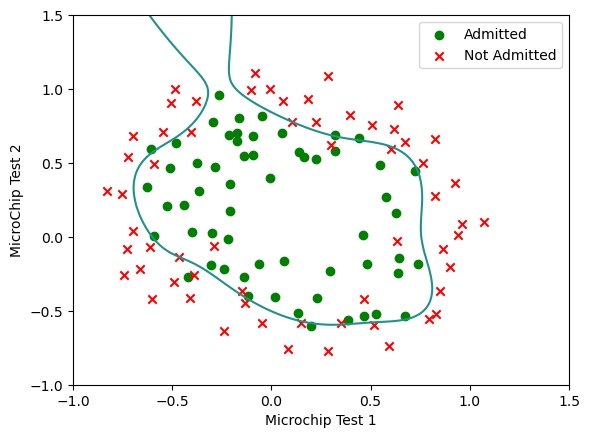

In [40]:
# 绘图 (这里的绘图我是抄别人的，因为我对 numpy 和 matplotlib这几个库不是很了解，所以我就不发表我的拙见了)
# 准备用于绘制决策边界的数据

# 特征工程
def featureMapping(x1, x2, degree):
    data = {}
    for i in np.arange(degree + 1):
        for j in np.arange(i + 1):
            data["F{}{}".format(i - j, j)] = np.power(x1, i - j) * np.power(x2, j)
    pass
    return pd.DataFrame(data)


plt_x = np.linspace(-1, 1.5, 150)
plt_xx, plt_yy = np.meshgrid(plt_x, plt_x)
z = np.array(featureMapping(plt_xx.ravel(), plt_yy.ravel(), 6))
z = z @ theta
z = z.reshape(plt_xx.shape)

# 绘图
plt.scatter(x=positive[microchip_test1_label], y=positive[microchip_test2_label], marker='o', c='g', label='Admitted')
plt.scatter(x=negative[microchip_test1_label], y=negative[microchip_test2_label], marker='x', c='r',
            label='Not Admitted')
plt.legend()
plt.xlabel(microchip_test1_label)
plt.ylabel(microchip_test2_label)
plt.contour(plt_xx, plt_yy, z, 0)
plt.show()